In [20]:
%matplotlib inline
#from neurotools.nlab import *
import os,sys
from numpy import *
from pylab import *
fontdir = './ucs-fonts'

In [21]:
fontfiles = [f for f in os.listdir(fontdir) if '.bdf' in f]
print('Available fonts:','\n\t'.join(fontfiles))

Available fonts: 9x15.bdf
	6x12.bdf
	7x13O.bdf
	5x7.bdf
	helvR12.bdf
	7x14.bdf
	6x9.bdf
	9x18B.bdf
	8x13.bdf
	5x8.bdf
	9x18.bdf
	6x13O.bdf
	4x6.bdf
	8x13O.bdf
	clR6x12.bdf
	7x13.bdf
	6x13B.bdf
	6x13.bdf
	6x10.bdf
	7x13B.bdf
	8x13B.bdf
	7x14B.bdf
	10x20.bdf
	9x15B.bdf


In [22]:
fontfile = '5x7.bdf'

with open(fontdir+os.sep+fontfile,'r') as f:
    data = f.readlines()
    

In [23]:
def tokenize(data):
    words = []
    in_token = False
    for token in data:
        if 'STARTCHAR' in token:
            in_token=True
        if in_token:
            words.append(token)
        if 'ENDCHAR' in token:
            yield words
            words=[]
            in_token=False

tokens = list(tokenize(data))

In [24]:
def parsechar(token):
    def maybeint(s):
        try:
            return int(s)
        except:
            return s
    properties = {k[0]:maybeint(k[1]) for k in [s.split() for s in token[:5]]}
    chardata = [int(s.strip(),16) for s in token[6:-1]]
    width = properties['DWIDTH']
    chardata = ["{0:b}".format(s).zfill(8)[:width] for s in chardata]
    asints   = int32([[c=='1' for c in line] for line in chardata])
    textdata = '\n'.join(chardata)
    textdata = textdata.replace('0','  ').replace('1','██')
    print(properties)
    print(textdata)
    
    return properties,chardata,asints
    
alldata = array([parsechar(k)[2] for k in tokens])
    

{'STARTCHAR': 'char0', 'ENCODING': 0, 'SWIDTH': 640, 'DWIDTH': 4, 'BBX': 4}
██  ██  
        
██  ██  
        
██  ██  
        
{'STARTCHAR': 'space', 'ENCODING': 32, 'SWIDTH': 640, 'DWIDTH': 4, 'BBX': 4}
        
        
        
        
        
        
{'STARTCHAR': 'exclam', 'ENCODING': 33, 'SWIDTH': 640, 'DWIDTH': 4, 'BBX': 4}
  ██    
  ██    
  ██    
        
  ██    
        
{'STARTCHAR': 'quotedbl', 'ENCODING': 34, 'SWIDTH': 640, 'DWIDTH': 4, 'BBX': 4}
██  ██  
██  ██  
        
        
        
        
{'STARTCHAR': 'numbersign', 'ENCODING': 35, 'SWIDTH': 640, 'DWIDTH': 4, 'BBX': 4}
██  ██  
████████
██  ██  
████████
██  ██  
        
{'STARTCHAR': 'dollar', 'ENCODING': 36, 'SWIDTH': 640, 'DWIDTH': 4, 'BBX': 4}
  ██    
██████  
████    
    ██  
██████  
  ██    
{'STARTCHAR': 'percent', 'ENCODING': 37, 'SWIDTH': 640, 'DWIDTH': 4, 'BBX': 4}
██      
    ██  
  ██    
██      
    ██  
        
{'STARTCHAR': 'ampersand', 'ENCODING': 38, 'SWIDTH': 640, 'DWIDTH': 4, '

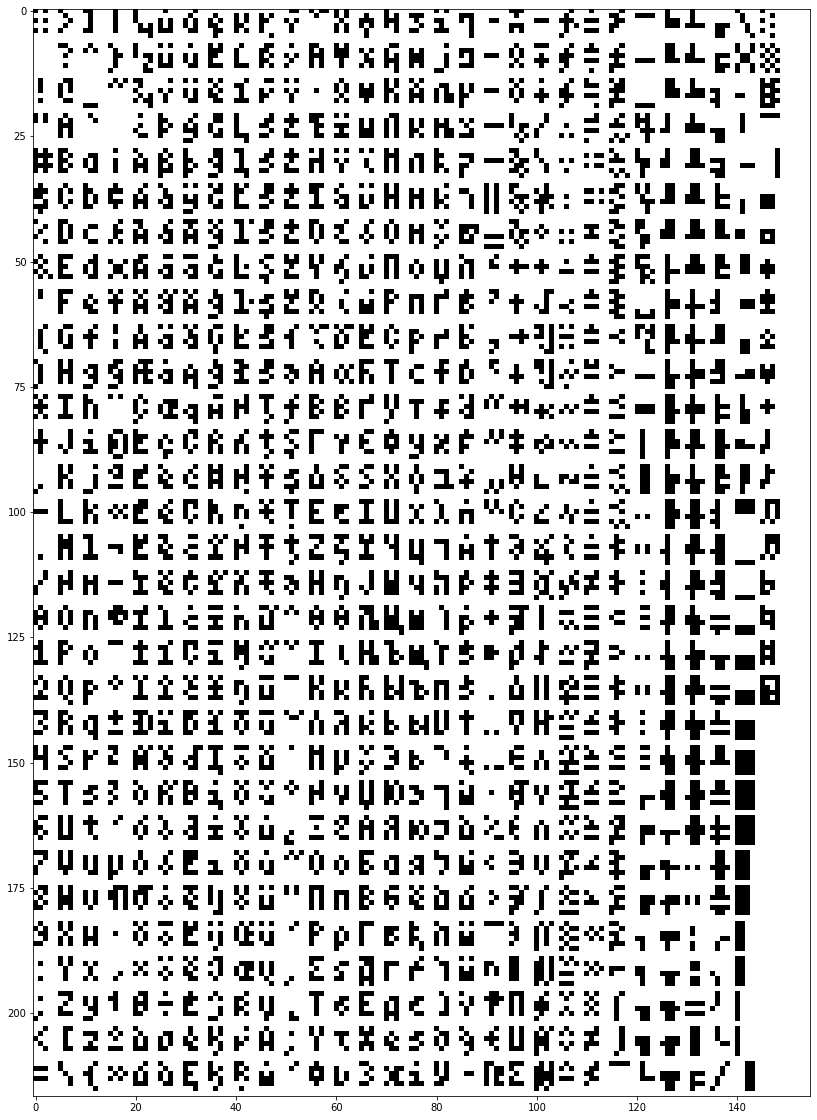

In [25]:
K,H,W = alldata.shape
M = int(ceil(sqrt(K)))

grid = zeros(((W+1)*M,(H+1)*M))

idx = 0
for i in range(M):
    for j in range(M):
        grid[i*(W+1):(i+1)*(W+1)-1,j*(H+1):(j+1)*(H+1)-1]=alldata[idx].T
        idx+=1
        if idx>=K: break
    if idx>=K: break

figure(figsize=(20,20))
imshow(grid.T,interpolation='nearest',cmap='bone_r')